# Metric and hyperparameter relationship analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read trials results 
These are stored in `trial_results.csv`

In [2]:
#results_dir = '/glade/work/molina/repos/s2sml/results_week3_605cyc/' # set results directory
results_dir = '/glade/work/molina/repos/s2sml/results_week3_605/'

df = pd.read_csv(results_dir+"trial_results.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,trial,learning_rate,weight_decay,train_batch_size,training_loss,model_name,epoch,lr,...,evals_perc,evals_mse,evals_mae,evals_ssim,evals_cesm_perc,evals_cesm_mse,evals_cesm_mae,evals_cesm_ssim,total_params,train_params
0,0,0,0,0.000253,4.820381e-10,54,xtanh,unet++,14,2.226320e-04,...,0.015891,0.002706,0.039362,0.791276,0.02083,0.003096,0.042058,0.849145,26081745,26081745
1,0,0,1,0.000004,1.206312e-05,249,mae,deeplabv3,0,2.351432e-07,...,0.044319,0.044425,0.177474,0.578577,0.02083,0.003096,0.042058,0.849145,26010241,26010241
2,0,0,2,0.000443,1.179042e-06,224,xtanh,unet,0,2.702240e-05,...,0.150929,0.063800,0.213786,0.197201,0.02083,0.003096,0.042058,0.849145,24439505,24439505
3,0,0,3,0.000010,8.145858e-11,5,xsigmoid,pspnet,12,2.477765e-06,...,0.034732,0.003204,0.043405,0.800868,0.02083,0.003096,0.042058,0.849145,21441121,21441121
4,0,0,4,0.000020,8.744351e-12,7,mae,deeplabv3,9,1.103434e-05,...,0.031918,0.003568,0.045851,0.810927,0.02083,0.003096,0.042058,0.849145,26010241,26010241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,69,69,662,0.000868,1.625921e-11,13,mse,unet++,4,6.444440e-04,...,0.007306,0.002665,0.040194,0.839626,0.02083,0.003096,0.042058,0.849145,26081745,26081745
663,65,65,663,0.000144,1.674153e-11,112,mse,unet++,20,1.387255e-04,...,0.040025,0.002763,0.040443,0.708613,0.02083,0.003096,0.042058,0.849145,26081745,26081745
664,59,59,664,0.000834,2.135945e-08,11,mse,unet++,10,9.550094e-07,...,0.007437,0.002272,0.036405,0.858213,0.02083,0.003096,0.042058,0.849145,26081745,26081745
665,67,67,665,0.000002,7.811726e-12,10,mse,unet++,37,1.330452e-07,...,0.127769,0.006458,0.062407,0.381808,0.02083,0.003096,0.042058,0.849145,26081745,26081745


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trial', 'learning_rate', 'weight_decay',
       'train_batch_size', 'training_loss', 'model_name', 'epoch', 'lr',
       'train_loss', 'train_corr', 'tcesm_corr', 'tcorr_cust', 'tmse_cust',
       'tmae_cust', 'tgrad_inp', 'tgrad_lbl', 'tgrad_out', 'valid_loss',
       'valid_corr', 'vcesm_corr', 'vcorr_cust', 'vmse_cust', 'vmae_cust',
       'vgrad_inp', 'vgrad_lbl', 'vgrad_out', 'vmse_extreme_outp',
       'vmse_extreme_cesm', 'valid_perc', 'valid_mse', 'valid_mae',
       'valid_ssim', 'valid_cesm_perc', 'valid_cesm_mse', 'valid_cesm_mae',
       'valid_cesm_ssim', 'evals_loss', 'evals_corr', 'ecesm_corr',
       'ecorr_cust', 'emse_cust', 'emae_cust', 'egrad_inp', 'egrad_lbl',
       'egrad_out', 'emse_extreme_outp', 'emse_extreme_cesm', 'evals_perc',
       'evals_mse', 'evals_mae', 'evals_ssim', 'evals_cesm_perc',
       'evals_cesm_mse', 'evals_cesm_mae', 'evals_cesm_ssim', 'total_params',
       'train_params'],
      dtype='object')

### analysis of all validation metrics

In [5]:
df_valid = df[['trial', 'valid_corr', 'vcorr_cust', 'vmse_cust', 
               'vmae_cust', 'vgrad_out', 'vmse_extreme_outp', 'valid_perc', 
               'valid_mse', 'valid_mae', 'valid_ssim', 'total_params', 'train_params']]

In [6]:
pear_corr = df_valid.drop(columns=['trial']).corr(method='pearson')

In [7]:
pear_corr.style.background_gradient(cmap='coolwarm')

,valid_corr,vcorr_cust,vmse_cust,vmae_cust,vgrad_out,vmse_extreme_outp,valid_perc,valid_mse,valid_mae,valid_ssim,total_params,train_params
valid_corr,1.000000,-0.220369,-0.916297,-0.947338,0.773325,-0.939949,-0.558646,-0.903292,-0.942608,0.691247,0.188484,0.188484
vcorr_cust,-0.220369,1.000000,0.159103,0.174739,-0.236137,0.173872,0.032547,0.158864,0.174178,-0.069726,-0.012417,-0.012417
vmse_cust,-0.916297,0.159103,1.000000,0.978194,-0.670559,0.988827,0.568843,0.998070,0.978642,-0.667727,-0.209149,-0.209149
vmae_cust,-0.947338,0.174739,0.978194,1.000000,-0.684723,0.982647,0.646844,0.973911,0.999476,-0.757180,-0.223281,-0.223281
vgrad_out,0.773325,-0.236137,-0.670559,-0.684723,1.000000,-0.711704,-0.106738,-0.663742,-0.682342,0.308772,0.220223,0.220223
vmse_extreme_outp,-0.939949,0.173872,0.988827,0.982647,-0.711704,1.000000,0.567080,0.988143,0.983828,-0.671776,-0.213113,-0.213113
valid_perc,-0.558646,0.032547,0.568843,0.646844,-0.106738,0.567080,1.000000,0.569330,0.648394,-0.941065,-0.104942,-0.104942
valid_mse,-0.903292,0.158864,0.998070,0.973911,-0.663742,0.988143,0.569330,1.000000,0.976183,-0.662914,-0.210971,-0.210971
valid_mae,-0.942608,0.174178,0.978642,0.999476,-0.682342,0.983828,0.648394,0.976183,1.000000,-0.756301,-0.223968,-0.223968
valid_ssim,0.691247,-0.069726,-0.667727,-0.757180,0.308772,-0.671776,-0.941065,-0.662914,-0.756301,1.000000,0.126273,0.126273


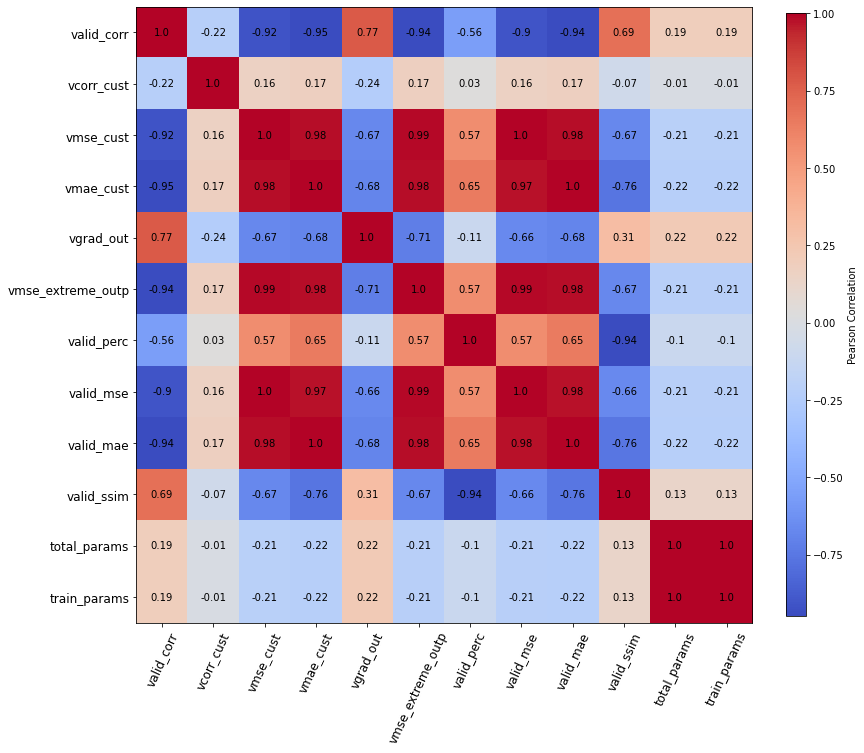

In [8]:
fig, ax = plt.subplots(figsize=(12,12))

im = ax.imshow(pear_corr, cmap='coolwarm')
cbar = fig.colorbar(im, orientation='vertical', aspect=30, fraction = 0.03, 
                    label='Pearson Correlation')

# Show all ticks and label them with the dataframe column name
ax.set_xticks(np.arange(0,pear_corr.columns.shape[0],1))
ax.set_yticks(np.arange(0,pear_corr.columns.shape[0],1))
ax.set_xticklabels(pear_corr.columns, rotation=65, fontsize=12)
ax.set_yticklabels(pear_corr.columns, rotation=0, fontsize=12)

# Loop over data dimensions and create text annotations
for i in range(len(pear_corr.columns)):
    for j in range(len(pear_corr.columns)):
        text = ax.text(j, i, round(pear_corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black", fontsize=10)

plt.savefig('metric_heatmap.png', bbox_inches='tight');
plt.show()

### analysis of pareto front simulation metrics

Sample command to get list of pareto front trials from echo:

`echo-report hyper.yml -k 15`

In [9]:
df_valid = df[['trial', 'training_loss', 'model_name', 'valid_corr', 
               'vcorr_cust', 'vmse_cust', 'vmae_cust', 'vgrad_out', 
               'vmse_extreme_outp', 'valid_perc', 'valid_mse', 
               'valid_mae', 'valid_ssim', 'total_params', 'train_params']]

In [10]:
# select the trials that are on the pareto front
df_pareto = df_valid[np.isin(
    df_valid['trial'], [139,309,317,318,447,489,499,501,502,511,536,541,543,547,615])]

In [11]:
df_pareto

,trial,training_loss,model_name,valid_corr,vcorr_cust,vmse_cust,vmae_cust,vgrad_out,vmse_extreme_outp,valid_perc,valid_mse,valid_mae,valid_ssim,total_params,train_params
139,139,mse,manet,0.967265,0.984091,0.529376,0.711424,0.080275,0.003303,0.013846,0.002080,0.033759,0.884093,31786769,31786769
309,309,mse,unet++,0.966245,0.986481,0.545083,0.715044,0.081840,0.001831,0.011658,0.002104,0.033689,0.888351,26081745,26081745
317,317,mse,unet++,0.970151,0.984547,0.530799,0.717827,0.078747,0.002368,0.012892,0.001879,0.033007,0.879735,26081745,26081745
318,318,mse,unet++,0.964302,0.984405,0.507908,0.698193,0.076608,0.001536,0.011355,0.002053,0.033748,0.883605,26081745,26081745
447,447,mse,unet++,0.964094,0.984612,0.512836,0.698606,0.075527,0.001400,0.014125,0.002067,0.033748,0.883286,26081745,26081745
489,489,mse,unet++,0.970037,0.984662,0.526538,0.713436,0.079955,0.002446,0.009325,0.001864,0.032803,0.878900,26081745,26081745
499,499,mse,unet++,0.963424,0.985310,0.519600,0.704721,0.077195,0.001308,0.012529,0.002113,0.034075,0.873608,26081745,26081745
501,501,mse,unet++,0.963813,0.984917,0.515233,0.703809,0.076880,0.001345,0.012222,0.002099,0.034034,0.873647,26081745,26081745
502,502,mse,unet++,0.963799,0.984929,0.517285,0.706197,0.077496,0.001301,0.012306,0.002110,0.034159,0.874878,26081745,26081745
511,511,mae,unet++,0.968694,0.986026,0.551238,0.731979,0.084436,0.002087,0.013563,0.001950,0.033657,0.873583,26081745,26081745


In [12]:
# what models are on the pareto front?
df_pareto['model_name'].value_counts()

unet++    14
manet      1
Name: model_name, dtype: int64

In [13]:
# what loss funcs are on the pareto front?
df_pareto['training_loss'].value_counts()

mse         10
xtanh        3
mae          1
xsigmoid     1
Name: training_loss, dtype: int64

In [14]:
df_pareto['train_params'].value_counts()

26081745    14
31786769     1
Name: train_params, dtype: int64

In [15]:
df_valid['train_params'].value_counts()

26081745    325
31786769    211
21441121     23
26010241     22
24439505     22
23158529     22
22440593     21
21775073     21
Name: train_params, dtype: int64

In [16]:
df_valid['total_params'].value_counts()

26081745    325
31786769    211
21441121     23
26010241     22
24439505     22
23158529     22
22440593     21
21775073     21
Name: total_params, dtype: int64

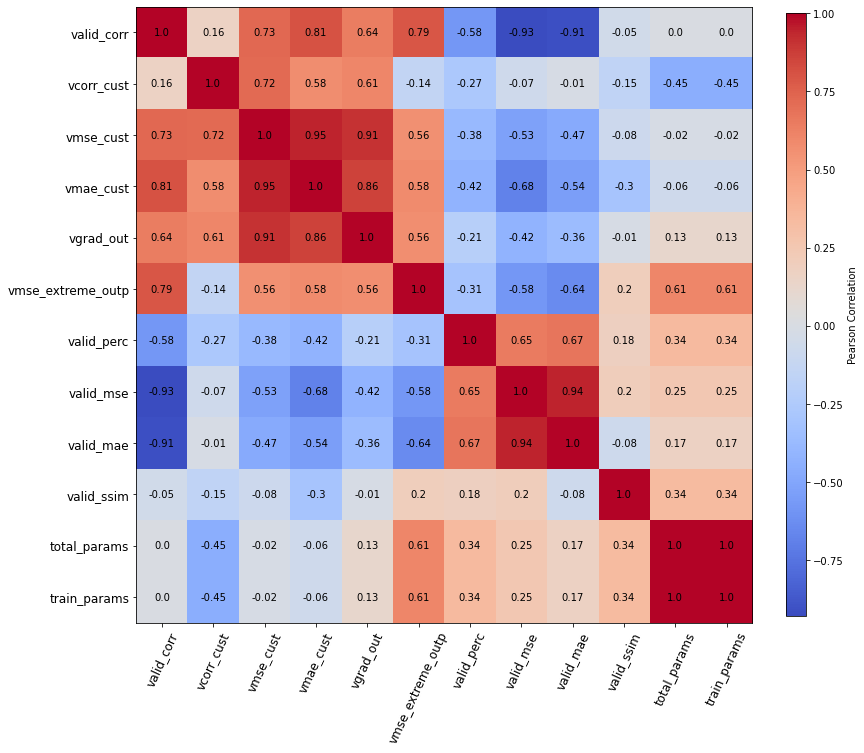

In [17]:
# pearson corr heatmap only for the pareto front trials
pear_corr = df_pareto.drop(columns=['trial']).corr(method='pearson')

fig, ax = plt.subplots(figsize=(12,12))

im = ax.imshow(pear_corr, cmap='coolwarm')
cbar = fig.colorbar(im, orientation='vertical', aspect=30, fraction = 0.03, 
                    label='Pearson Correlation')

# Show all ticks and label them with the dataframe column name
ax.set_xticks(np.arange(0,pear_corr.columns.shape[0],1))
ax.set_yticks(np.arange(0,pear_corr.columns.shape[0],1))
ax.set_xticklabels(pear_corr.columns, rotation=65, fontsize=12)
ax.set_yticklabels(pear_corr.columns, rotation=0, fontsize=12)

# Loop over data dimensions and create text annotations
for i in range(len(pear_corr.columns)):
    for j in range(len(pear_corr.columns)):
        text = ax.text(j, i, round(pear_corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black", fontsize=10)

plt.show()

# visualizing certain metrics

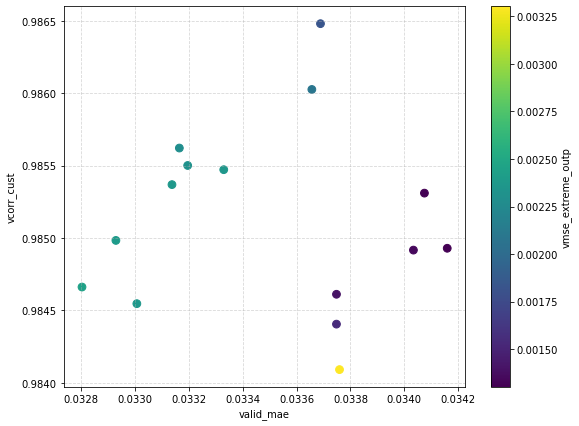

In [18]:
fig, ax = plt.subplots(figsize=(9,7))

df_pareto.plot.scatter(
    x='valid_mae', y='vcorr_cust', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

ax.grid(alpha=0.5,ls='--')
plt.show()

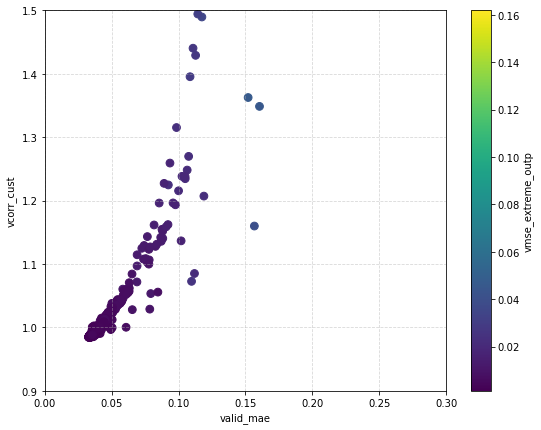

In [19]:
# all trials for comparison
fig, ax = plt.subplots(figsize=(9,7))

df_valid.plot.scatter(
    x='valid_mae', y='vcorr_cust', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

ax.set_xlim(0.0, 0.3)
ax.set_ylim(0.9, 1.5)

ax.grid(alpha=0.5,ls='--')
plt.show()

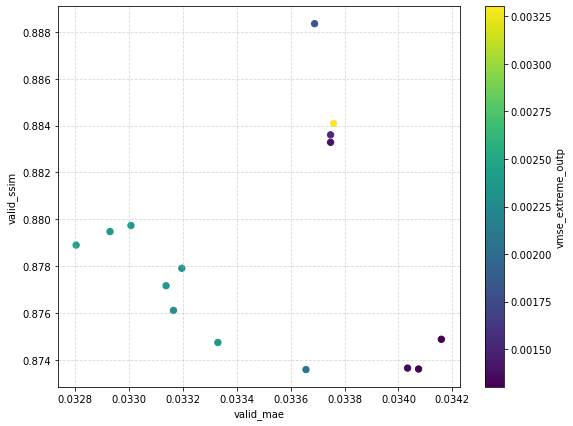

In [20]:
fig, ax = plt.subplots(figsize=(9,7))

df_pareto.plot.scatter(
    x='valid_mae', y='valid_ssim', s=40, c='vmse_extreme_outp', cmap='viridis', ax=ax)

ax.grid(alpha=0.5,ls='--')
plt.show()

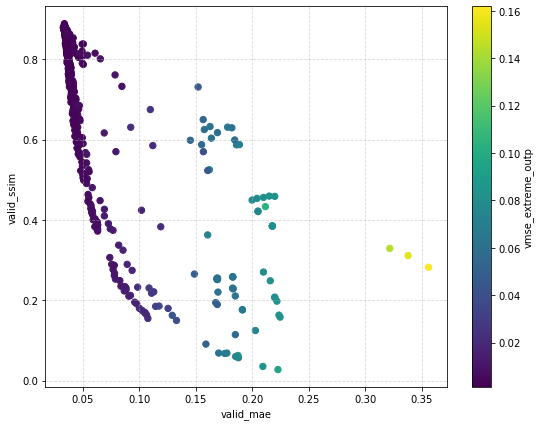

In [21]:
fig, ax = plt.subplots(figsize=(9,7))

df_valid.plot.scatter(
    x='valid_mae', y='valid_ssim', s=40, c='vmse_extreme_outp', cmap='viridis', ax=ax)

ax.grid(alpha=0.5,ls='--')
plt.show()

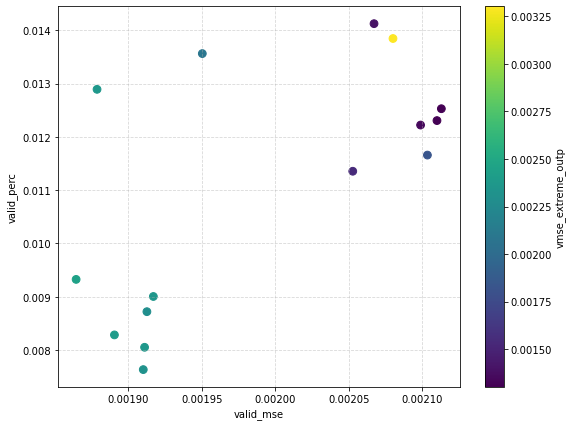

In [22]:
# all trials for comparison
fig, ax = plt.subplots(figsize=(9,7))

df_pareto.plot.scatter(
    x='valid_mse', y='valid_perc', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

#ax.set_xlim(0.0, 0.3)
#ax.set_ylim(0.9, 1.5)

ax.grid(alpha=0.5,ls='--')
plt.show()

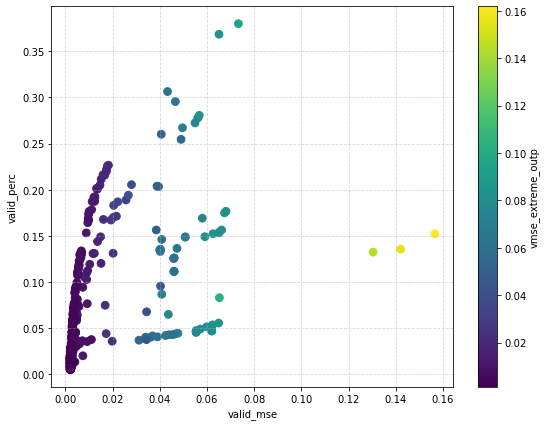

In [23]:
# all trials for comparison
fig, ax = plt.subplots(figsize=(9,7))

df_valid.plot.scatter(
    x='valid_mse', y='valid_perc', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

#ax.set_xlim(0.0, 0.3)
#ax.set_ylim(0.9, 1.5)

ax.grid(alpha=0.5,ls='--')
plt.show()

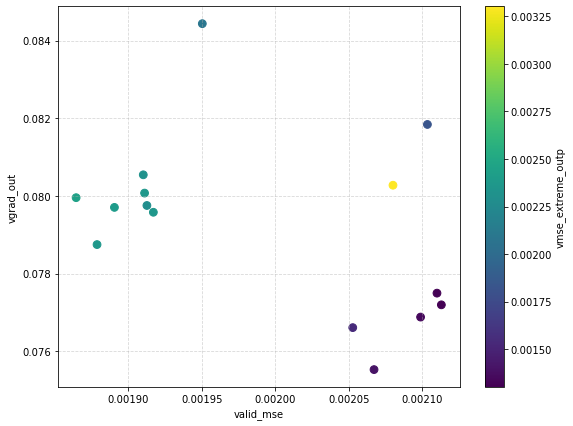

In [24]:
# all trials for comparison
fig, ax = plt.subplots(figsize=(9,7))

df_pareto.plot.scatter(
    x='valid_mse', y='vgrad_out', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

#ax.set_xlim(0.0, 0.3)
#ax.set_ylim(0.9, 1.5)

ax.grid(alpha=0.5,ls='--')
plt.show()

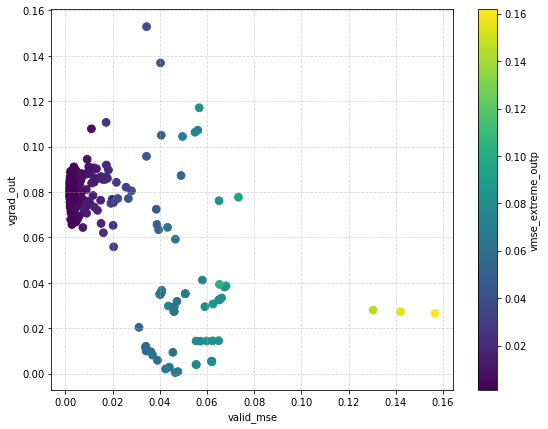

In [25]:
# all trials for comparison
fig, ax = plt.subplots(figsize=(9,7))

df_valid.plot.scatter(
    x='valid_mse', y='vgrad_out', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

#ax.set_xlim(0.0, 0.3)
#ax.set_ylim(0.9, 1.5)

ax.grid(alpha=0.5,ls='--')
plt.show()

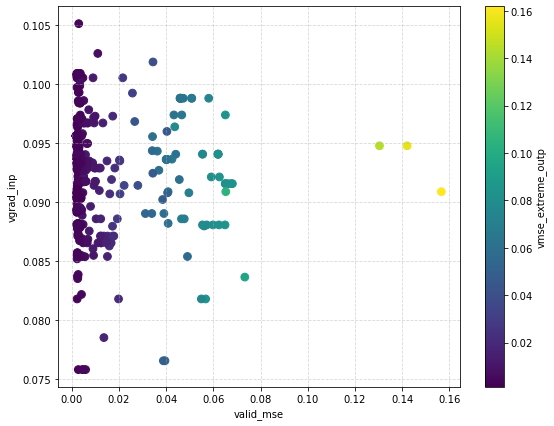

In [26]:
# all trials for comparison
fig, ax = plt.subplots(figsize=(9,7))

df.plot.scatter(
    x='valid_mse', y='vgrad_inp', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

#ax.set_xlim(0.0, 0.3)
#ax.set_ylim(0.9, 1.5)

ax.grid(alpha=0.5,ls='--')
plt.show()

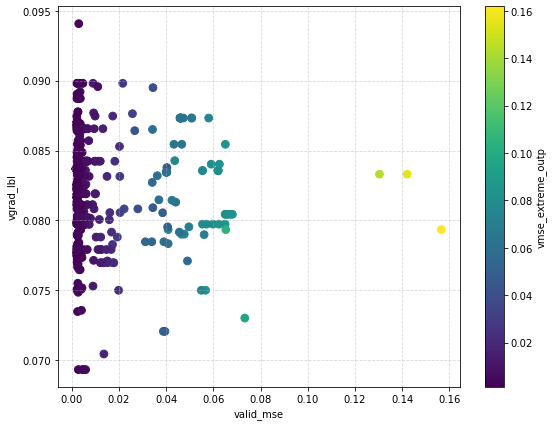

In [27]:
# all trials for comparison
fig, ax = plt.subplots(figsize=(9,7))

df.plot.scatter(
    x='valid_mse', y='vgrad_lbl', s=60, c='vmse_extreme_outp', cmap='viridis', ax=ax)

#ax.set_xlim(0.0, 0.3)
#ax.set_ylim(0.9, 1.5)

ax.grid(alpha=0.5,ls='--')
plt.show()